## Homework 3: Submission
### Name: Ximena Calderon Arevalo 
#### Date: March 5

### Problem 3.1

In [3]:
import numpy as np

In [4]:
def monty_hall(chosen_door, switch = False):
    # Correct indexing for chosen door
    chosen_door += -1 
    
    doors = [0, 0, 0]
    doors[np.random.randint(0,3)] = 1
    
    revealed_door = np.random.choice([i for i, x in enumerate(doors) if x == 0 and i != chosen_door])
    switch_door = list({0, 1, 2} - {chosen_door, revealed_door})[0]
    
    
    if switch == False:
        result = doors[chosen_door]
    else:
        result = doors[switch_door]
        
    #this allows the next section to sum the values, otherwise it returned as nonetype, taking the step above and returning either 0(failure) or 1(success):
    if result == 0:
        return 0
    if result == 1:
        return 1
            

In [7]:
i = 0
stay = []
switch = []
while i < 100000:
    stay.append(monty_hall(np.random.randint(1, 4)))
    switch.append(monty_hall(np.random.randint(1, 4), switch = True))
    i += 1
    
print(f"Stay win rate:{round(100 * np.sum(stay) / 100000, 1)}%")
print(f"Switch win rate:{round(100 * np.sum(switch) / 100000, 1)}%")

Stay win rate:33.5%
Switch win rate:66.7%


The simulation above tells us that it is always better to switch to the other door. This result agrees with the theoretical explanation of the problem using conditional probabilities and Bayes rule.

### Problem 3.2

Pick a uniform random number between 0 and 1 (r). Use this to create an integer in
the range between 0 and 9999 by n1 = np.int(r*9999)

In [8]:
i=0
n1list = [] # for the last part of the last problem
n4list=[]
while i < 1000:
    r = np.random.uniform(0,1)
    n1= np.int(r*9999)
    n1list.append(n1)
    n2 = np.int(r*n1)
    n3 = np.int(r*n2)
    n4list.append(np.int(r*n3))
    i+=1
    

In [9]:
len(n1list) # just making sure the loop above worked and the list is the correct size

1000

In [10]:
import matplotlib.pyplot as plt

(array([540., 102.,  70.,  67.,  48.,  33.,  44.,  28.,  37.,  31.]),
 array([   0. ,  989.5, 1979. , 2968.5, 3958. , 4947.5, 5937. , 6926.5,
        7916. , 8905.5, 9895. ]),
 <BarContainer object of 10 artists>)

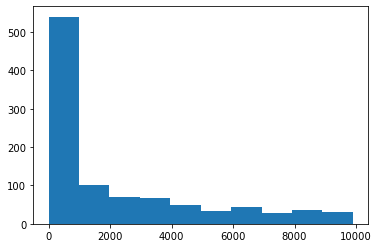

In [11]:
plt.hist(n4list)

In [12]:
def first_digit(num):
    if num < 10:
        return num
    return first_digit(num // 10)

In [13]:
result = [first_digit(n) for n in n4list]

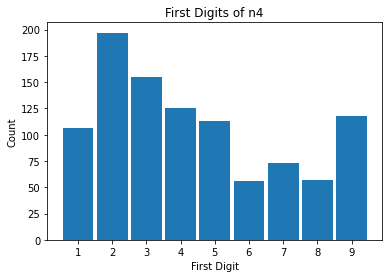

In [60]:
plt.hist(result,bins=9,align='right',rwidth=0.9);
plt.xticks(np.arange(1,10, 1));
plt.ylabel('Count')
plt.xlabel('First Digit')
plt.title("First Digits of n4");

I honestly cannot figure out why the alignment is off on these histograms- I've tried varying the rwidth to different things and spacing out the yticks and modifying alignment but it is always just slightly off. 

In [21]:
firstofn1 = [first_digit(n) for n in n1list]

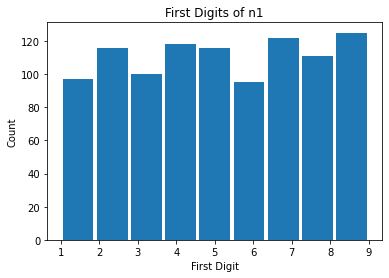

In [64]:
plt.hist(firstofn1,bins=9,align='mid',rwidth=0.9);
plt.xticks(np.arange(1, 10, 1))
plt.ylabel('Count');
plt.xlabel('First Digit')
plt.title("First Digits of n1");

While n4 shows Benford's Law, as stated in the hw pdf, the distribution of the first digits of n1 is very different and appear at a similar frequency. 